<a href="https://colab.research.google.com/github/BaeSang1/Study/blob/main/202304/Matplotlib_Seaborn_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')
tips.head()

tips_day = tips.groupby("day").mean().reset_index()
tips_day["day"] = ["Thursday","Friday","Saturday","Sunday"]
tips_day["total_bill"] = [round(i,2) for i in tips_day["total_bill"]]
tips_day["tip"] = [round(i,2) for i in tips_day["tip"]]
tips_day["size"] = [round(i) for i in tips_day["size"]]
tips_day = tips_day.sort_values(by="total_bill", ascending=False).reset_index(drop=True)
color_data = {"Sunday":"red","Saturday":"blue"}
tips_day

,day,total_bill,tip,size
0,Sunday,21.41,3.26,3
1,Saturday,20.44,2.99,3
2,Thursday,17.68,2.77,2
3,Friday,17.15,2.73,2


In [ ]:
def plot_example(ax, zorder=0):
    ax.bar(tips_day["day"],tips_day["tip"], color="lightgray", zorder=zorder)
    ax.set_title("tip (mean)", fontsize=16, pad=12)
    
    # Value
    h_pad = 0.1
    for i in range(4):
        fontweight = "normal"
        color = "k"
        if i == 0:
            fontweight = "bold"
            color = "darkred"
        if i == 1:
            fontweight = "heavy"
            color = "darkblue"
        
        ax.text(i, tips_day["tip"].loc[i] + h_pad, f"{tips_day['tip'].loc[i]:0.2f}",
                horizontalalignment = "center", fontsize=12, fontweight=fontweight, color=color)
        
    ax.set_xticks(tips_day.index)
    ax.set_xticklabels(["Sunday","Saturday","Thursday","Friday"],fontsize=12,fontweight="heavy")
    ax.set_xlabel("days")
    ax.set_ylabel("tip($)")
    
    # Sunday
    ax.patches[0].set_facecolor("darkred")
    ax.patches[0].set_edgecolor("black")
    ax.patches[1].set_facecolor("darkblue")
    ax.patches[1].set_edgecolor("black")
    
    # set_range
    ax.set_ylim(0,4)
    return ax

In [ ]:
def plot_example2(ax, zorder=0):
    ax.bar(tips_day["day"],tips_day["total_bill"], color="lightgray", zorder=zorder)
    ax.set_title("total_bill (mean)", fontsize=16, pad=12)
    
    
    # Value
    h_pad = 0.5
    for i in range(4):
        fontweight = "normal"
        color = "k"
        if i == 0:
            fontweight = "bold"
            color = "darkred"
        if i == 1:
            fontweight = "bold"
            color = "darkblue"
        
        ax.text(i, tips_day["total_bill"].loc[i] + h_pad, f"{tips_day['total_bill'].loc[i]:0.2f}",
                horizontalalignment = "center", fontsize=12, fontweight=fontweight, color=color)
    
    
    ax.set_xlabel("days")
    ax.set_ylabel("total_bill($)")
    ax.set_xticks(tips_day.index)
    ax.set_xticklabels(["Sunday","Saturday","Thursday","Friday"],fontsize=12,fontweight="heavy")
    
    
    # Sunday
    ax.patches[0].set_facecolor("darkred")
    ax.patches[0].set_edgecolor("black")
    ax.patches[1].set_facecolor("darkblue")
    ax.patches[1].set_edgecolor("black")
    
    # set_range
    ax.set_ylim(0,25)
    return ax

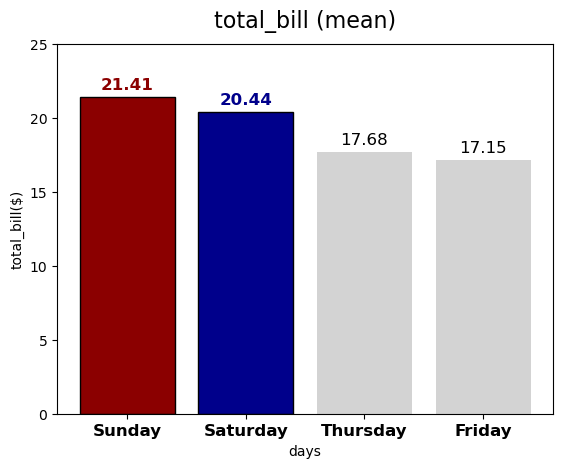

In [ ]:
fig, ax = plt.subplots()
ax = plot_example2(ax)

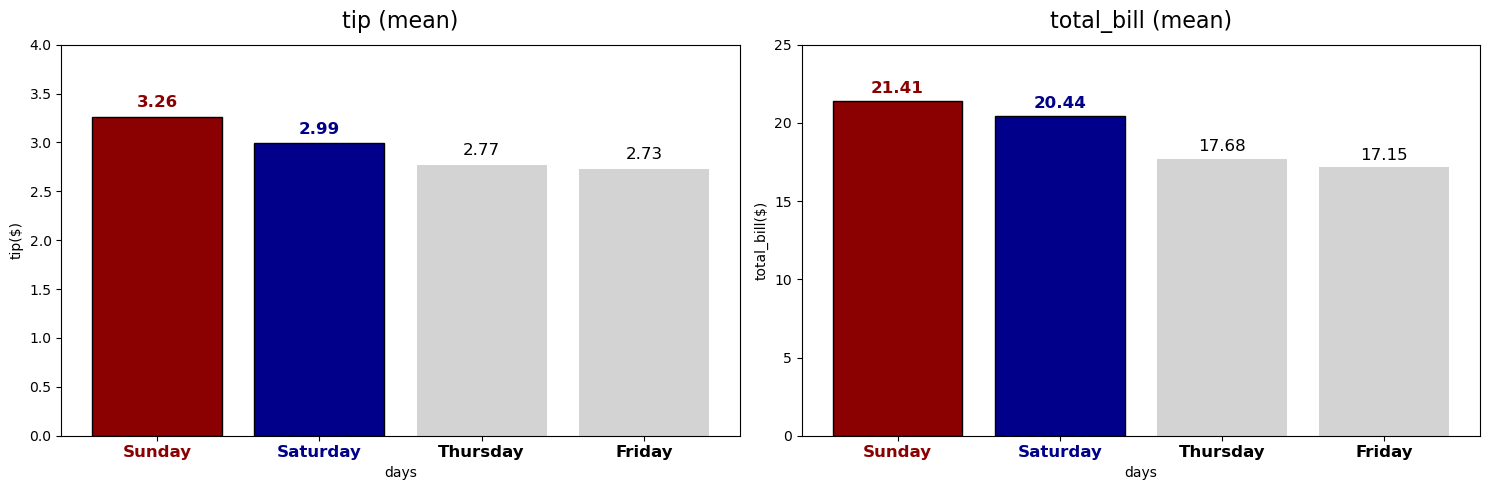

In [ ]:
fig,ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0] = plot_example(ax[0], zorder=2)
ax[1] = plot_example2(ax[1],zorder=2)

x1_tick_labels = ax[0].get_xticklabels()
x2_tick_labels = ax[1].get_xticklabels()


for label in x1_tick_labels:
    if label.get_text() == "Sunday":
        label.set_color('darkred')
    if label.get_text() == "Saturday":
        label.set_color("darkblue")

for label in x2_tick_labels:
    if label.get_text() == "Sunday":
        label.set_color('darkred')
    if label.get_text() == "Saturday":
        label.set_color("darkblue") 
        
        
plt.tight_layout()
plt.show()

In [ ]:
type(ax.spines)

matplotlib.spines.Spines

In [ ]:
for k,v in ax.spines.items():
    print(f"spines[{k}] = {v}")

spines[left] = Spine
spines[right] = Spine
spines[bottom] = Spine
spines[top] = Spine


In [ ]:
ax.spines.values()
# 공식문서에 따르면 Spine은 Patch의 Subclass이고
# set_patch_circle, set_patch_arc가 호출되면 원이나 호를 그리기도 함
# 선을 그리는 set_patch_line이 기본값이다.

ValuesView(<matplotlib.spines.Spines object at 0x00000108CBFCC760>)

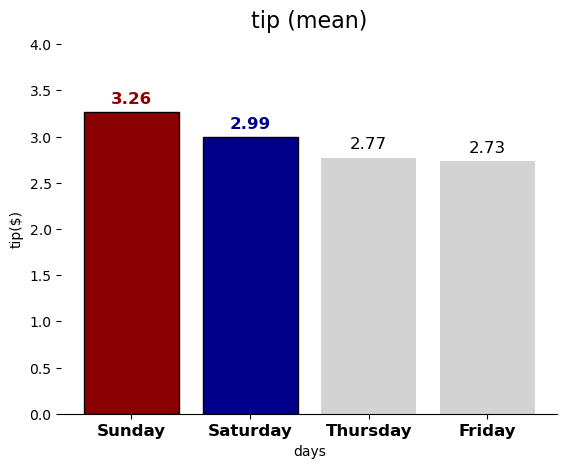

In [ ]:
# 위 그림에서 맨 아래만 남기고 왼,위,오 spines를 지워보겠습니다.
# set_visible(False) 명령을 사용하면 됩니다.
fig,ax = plt.subplots()
ax = plot_example(ax)

ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

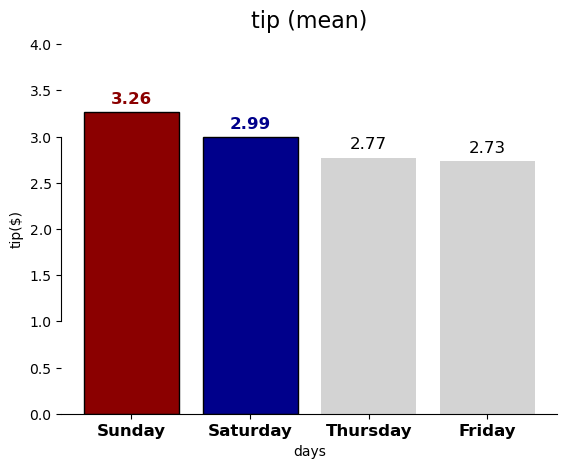

In [ ]:
# spines을 일부 영역만 보여주고 싶을 수도 있습니다.
# 왼쪽 spine을 안보이게 하는 대신 가운데만 그려봅시다.
# set_bounds(min,max)를 사용합니다.
fig,ax = plt.subplots()
ax = plot_example(ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.spines["left"].set_bounds(1,3)

In [ ]:
# spines 위치 지정하기
# set_potision((direction,distance))을 사용해서 할 수 있습니다.
# 먼저, get_position()을 사용해서 spines["left"]가 어떻게 설정돼있나 보겠습니다.
ax.spines["left"].get_position()

('outward', 0.0)

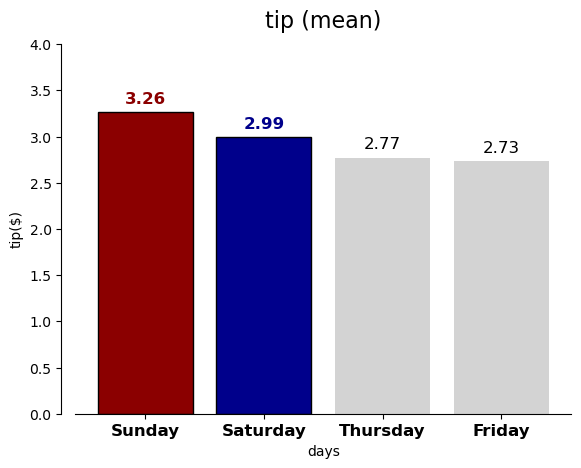

In [ ]:
# 밖으로("outward") 0만큼 나가있다고 합니다.
# set_position(("outward", 10))을 설정해서 조금 간격을 띄워보겠습니다.
fig,ax = plt.subplots()
ax = plot_example(ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("outward",10))

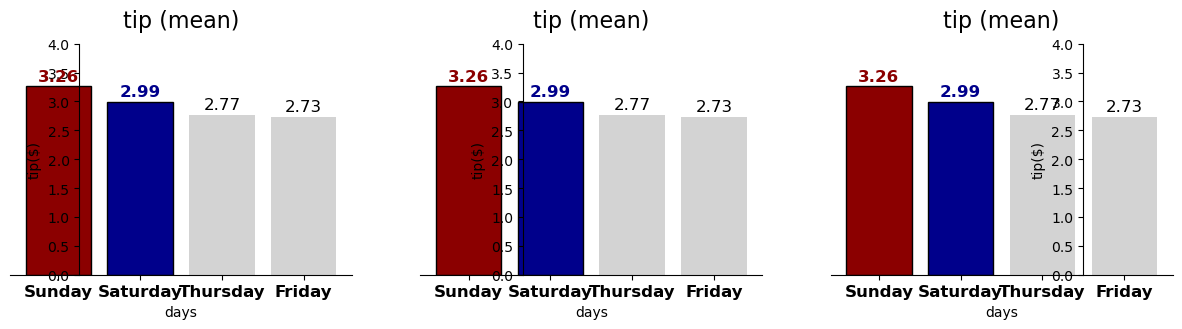

In [ ]:
# "outward"를 넣을 수 있으니 거꾸로 할 떄는 "inward"를 쓰면 될 것 같습니다.
# 그러나 그렇지 않습니다. 대신 거리를 음수로 넣으면 됩니다.
# "outward" 대신 "axes","data"를 넣을 수 있고, 의미는 다음과 같습니다.
fig,ax = plt.subplots(ncols=3,figsize=(15,3))

for i in range(3): # 그래프를 세 개 한번에 그리기
    ax[i] = plot_example(ax[i])
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    
# ax[0]: spine을 data 영역에서 지정된 거리만큼 이동
ax[0].spines["left"].set_position(("outward",-50))

# ax[1]: spine을 axes의 지정된 위치에 설정
ax[1].spines["left"].set_position(("axes",0.3))

# ax[2]: spine을 data의 지정된 위치에 설정
ax[2].spines["left"].set_position(("data",2.5))

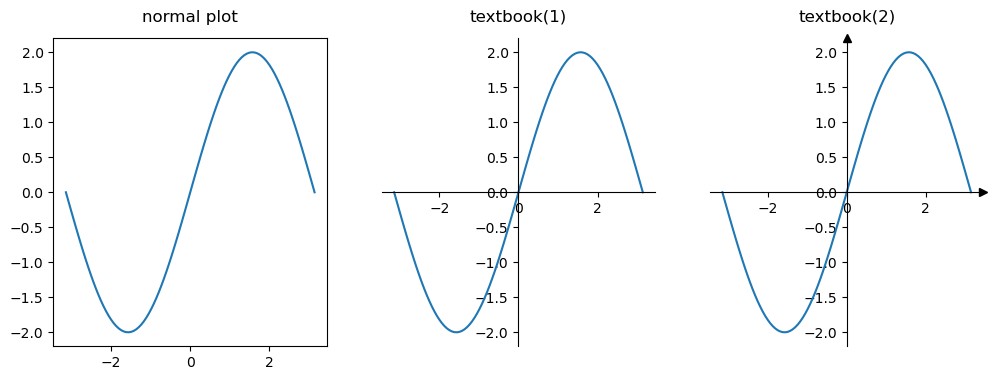

In [ ]:
# 이 기능을 이용하면 수학시간에 많이 보던 형태의 그래프를 그릴 수 있습니다.
## data
import numpy as np
x = np.linspace(-np.pi,np.pi,100)
y = 2 * np.sin(x)

fig,ax = plt.subplots(ncols=3,figsize=(12,4))

## normal plot
ax[0].plot(x,y)
ax[0].set_title("normal plot", pad=12)

## textbook(1)
ax[1].plot(x,y)
ax[1].set_title("textbook(1)",pad=12)
# top,right는 안보이게
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
# left,bottom은 (0,0)을 지나게
ax[1].spines["left"].set_position(("data",0))
ax[1].spines["bottom"].set_position(("data",0))

## textbook(2)
ax[2].plot(x,y)
ax[2].set_title("textbook(2)",pad=12)
# top,right는 안보이게
ax[2].spines["top"].set_visible(False)
ax[2].spines["right"].set_visible(False)
# left, bottom은 (0,0)을 지나가게
ax[2].spines["left"].set_position(("data",0))
ax[2].spines["bottom"].set_position(("data",0))
#화살표 추가
ax[2].plot(1,0,">k",transform=ax[2].get_yaxis_transform(),clip_on=False)
ax[2].plot(0,1,"^k",transform=ax[2].get_xaxis_transform(),clip_on=False)

plt.show()

In [ ]:
# 자주 사용할 것들은 이렇게 간단히 사용할 수 있습니다.
# set_position(("axes",0.5)) 대신 set_position("center")
# set_position(("data",0.0)) 대신 set_position("zero")

In [ ]:
# spines를 적절히 잡아주면 데이터를 읽기 좋아집니다.
# 그러나 데이터간 크기를 더 잘 비교하려면, 그림에 grid를 깔아주면 더 좋습니다.

# .grid(True) 메소드로 격자를 그릴 수 있습니다.
# axis = {"both","x","y"} 인자로 방향을 지정합니다.

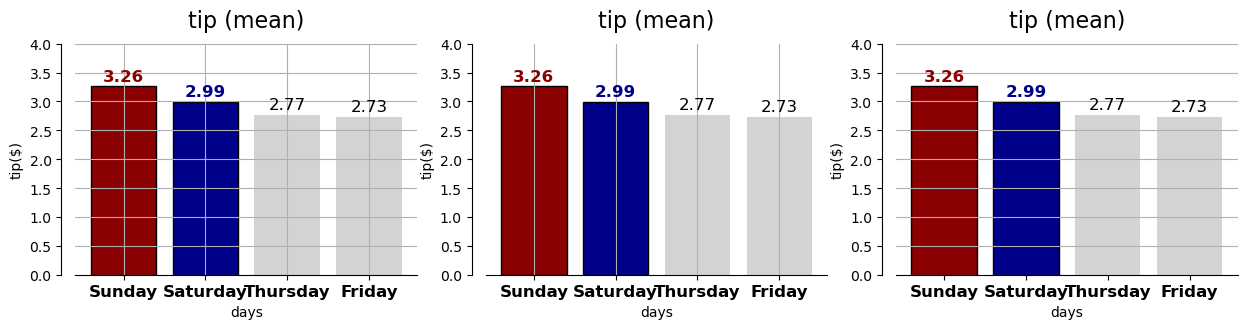

In [ ]:
fig,ax = plt.subplots(ncols=3, figsize=(15,3))

for i in range(3):
    ax[i] = plot_example(ax[i])
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_position(("outward",10))
    
#ax[0] : x,y 둘 다
ax[0].grid(axis="both")

#ax[1] : x축에서만
ax[1].grid(axis="x")

#ax[2] : y축에서만
ax[2].grid(axis="y")

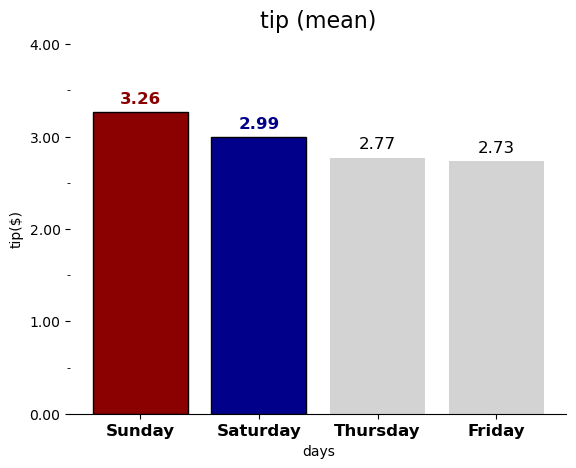

In [ ]:
# major and minor ticks
# grid는 major와 minor tick을 구분하여 그릴 수 있습니다.
# 먼저, major와 minor tick을 설정합니다.
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig,ax = plt.subplots()
ax = plot_example(ax)

#top, right, left spines 안보이기
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# y축 tick 설정
ax.yaxis.set_major_locator(MultipleLocator(1))   # major tick을 1 단위로 지정
ax.yaxis.set_major_formatter('{x:0.2f}')         # major tick format 지정 (오류가 나면 matplotlib upgrade)
ax.yaxis.set_minor_locator(MultipleLocator(0.5)) # minor tick을 0.5 단위로 지정

plt.show()

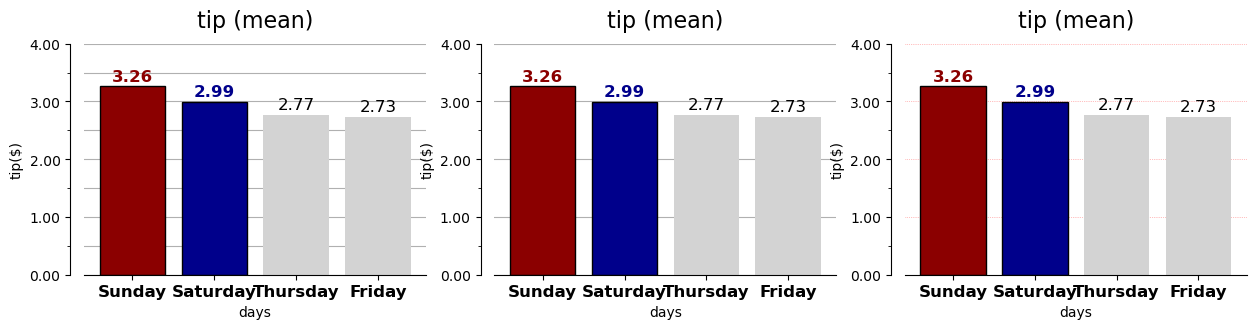

In [ ]:
# major grid only
# major와 minor ticks가 구분되면, 한 쪽을 선택해서 그릴 수 있습니다.
# major와 minor grid를 구부해서 지정할 수 있습니다.
# 따라서, 색상이나 선 스타일 등을 구분해서 변화시키기 좋습니다.
fig,ax = plt.subplots(ncols=3,figsize=(15,3))

for i in range(3):
    ax[i] = plot_example(ax[i], zorder=2) #zorder: bar를 grid 앞으로.
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_position(("outward",10))
    ax[i].yaxis.set_major_locator(MultipleLocator(1))
    ax[i].yaxis.set_major_formatter('{x:0.2f}')
    ax[i].yaxis.set_minor_locator(MultipleLocator(0.5))
    
# ax[0] : major, minor 둘 다
ax[0].grid(axis="y",which="both")

# ax[1] : major만
ax[1].grid(axis="y", which="major")

#ax[2] : major만 + 여러 옵션
ax[2].grid(axis="y", which="major", color="r", ls=":", lw=0.5, alpha=0.5)

plt.show()

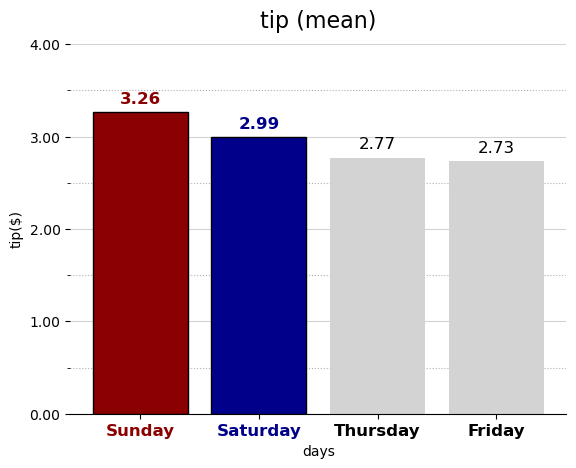

In [ ]:
# 최종적으로 다음과 같은 결과물을 얻을 수 있습니다.
# 불필요한 spine을 제거해서 시선 분산을 막고,
# grid를 추가해서 데이터들을 옆에 있는 숫자들과 비교하기 좋게 했습니다.
fig,ax = plt.subplots()
ax = plot_example(ax, zorder=2)
x_tick_labels = ax.get_xticklabels()

for label in x_tick_labels:
    if str(label.get_text()) == "Sunday":
        label.set_color('darkred')
    if str(label.get_text()) == "Saturday":
        label.set_color("darkblue")
        

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter('{x:0.2f}')
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

ax.grid(axis="y", which="major",color="lightgray")
ax.grid(axis="y", which="minor", ls=":")

plt.show()

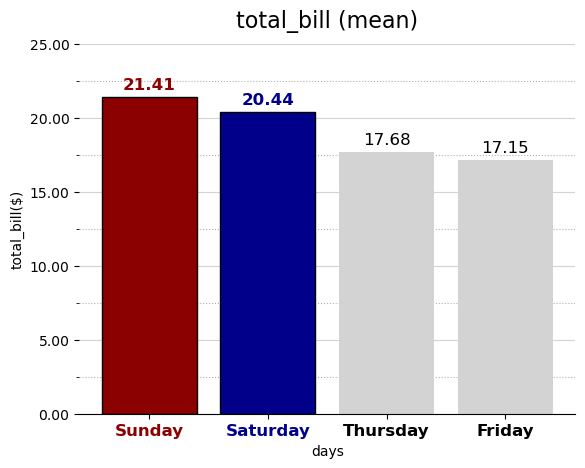

In [ ]:
# 최종적으로 다음과 같은 결과물을 얻을 수 있습니다.
# 불필요한 spine을 제거해서 시선 분산을 막고,
# grid를 추가해서 데이터들을 옆에 있는 숫자들과 비교하기 좋게 했습니다.
fig,ax = plt.subplots()
ax = plot_example2(ax, zorder=2)
x_tick_labels = ax.get_xticklabels()
y_tick_labels = ax.get_yticklabels()


for label in x_tick_labels:
    if str(label.get_text()) == "Sunday":
        label.set_color('darkred')
        label.set_fontweight("heavy")
    if str(label.get_text()) == "Saturday":
        label.set_color("darkblue")
    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)


ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter('{x:0.2f}')
ax.yaxis.set_minor_locator(MultipleLocator(2.5))

ax.grid(axis="y", which="major",color="lightgray")
ax.grid(axis="y", which="minor", ls=":")

plt.show()